Name : Sravani Suravajhula
UTA ID : 1001778007

#### Abstract:

Understanding the sentences and interpreting them in a meaningful way is increasingly important with the current machine learning tools. In this project we try to predict the rating of a game review utilizing some of the models available 



#### Introduction:

BoardGameGeek (BGG) is an online forum for board gaming hobbyists and a game database that holds reviews, images and videos for over 101,000 different tabletop games, including European-style board games, wargames, and card games. In addition to the game database, the site allows users to rate games on a 1–10 scale and publishes a ranked list of board games

In this project we start analyzing the reviews for the different games from BoardGameGeek Data and train a model that can predict the rating based on a review. Once we trained different models available under sklearn, we will use a best fit model based on our resiults and use it for our web application when a user can enter and out model will predit the rating



#### Overview:

My process to do this follows a sequence of steps. I first started with reading the data into pandas dataframes. After 
that i removed some of the unnecessary data and keep the important data that will be helpful for further analysis. 
Then i started cleaning the data my removing all the unnecessary words which won't aide us in determining the ratings.

Finally once we cleanup the data, i used several machine learning models to determine the best fit for our requirement.
In every stage of this process i provided some additional details and also provided some visual way to interpret the 
results.

During this process i referred several documents and user guides to make it work with good run rime and decent results.
I incorporated all the credits and citations at the bottom in the References sections.

Let's begin with the actual process.


##### Import Libraries:
As a starting point first we will import all the required python modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import itertools
import copy
import random 
import pickle
from collections import defaultdict,Counter
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords,words
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from wordcloud import WordCloud

##### Read Data:
The below function will read the data from the respective folders. Here i loaded all the required files under a folder called data is stored within the current folder of this notebook.

After the function we utilized the function to load all the data into pandas dataframes and i printed the header for each dataframe to get a sense of the columns


In [2]:

def read_data():
    raw_additional_df=pd.read_csv('data/games_detailed_info.csv',index_col=0)
    raw_reviews_df=pd.read_csv('data/bgg-15m-reviews.csv')
    raw_score_df=pd.read_csv('data/2020-08-19.csv')
    
    return raw_additional_df,raw_reviews_df,raw_score_df

raw_additional_df,raw_reviews_df,raw_score_df=read_data()


In [3]:
raw_reviews_df.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,Torsten,10.0,NaN,30549,Pandemic
1,1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
2,2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
3,3,Mike Mayer,10.0,NaN,30549,Pandemic
4,4,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic


In [4]:
raw_additional_df.head()

,type,id,thumbnail,image,primary,alternate,description,yearpublished,minplayers,maxplayers,...,War Game Rank,Customizable Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
0,boardgame,30549,https://cf.geekdo-images.com/thumb/img/HEKrtpT...,https://cf.geekdo-images.com/original/img/j-pf...,Pandemic,"['EPIZOotic', 'Pandemia', 'Pandemia 10 Anivers...","In Pandemic, several virulent diseases have br...",2008,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,boardgame,822,https://cf.geekdo-images.com/thumb/img/kqE4YJS...,https://cf.geekdo-images.com/original/img/o4p6...,Carcassonne,"['Carcassonne Jubilee Edition', 'Carcassonne: ...",Carcassonne is a tile-placement game in which ...,2000,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,boardgame,13,https://cf.geekdo-images.com/thumb/img/g8LvJsd...,https://cf.geekdo-images.com/original/img/A-0y...,Catan,"['CATAN', 'Catan (Колонизаторы)', 'Catan telep...","In Catan (formerly The Settlers of Catan), pla...",1995,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,boardgame,68448,https://cf.geekdo-images.com/thumb/img/Grz-qM9...,https://cf.geekdo-images.com/original/img/3DP_...,7 Wonders,"['7 csoda', '7 Cudów Świata', '7 divů světa', ...",You are the leader of one of the 7 great citie...,2010,2,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,boardgame,36218,https://cf.geekdo-images.com/thumb/img/iPlTR5c...,https://cf.geekdo-images.com/original/img/oN8C...,Dominion,"['Dominion: Basisspiel', 'Dominion: In naam va...","&quot;You are a monarch, like your parents bef...",2008,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_score_df.head()

,Unnamed: 0,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,90,30549,Pandemic,2008,91,7.62,7.518,96186,/boardgame/30549/pandemic,https://cf.geekdo-images.com/micro/img/0m3-oqB...
1,172,822,Carcassonne,2000,173,7.42,7.311,96181,/boardgame/822/carcassonne,https://cf.geekdo-images.com/micro/img/z0tTaij...
2,380,13,Catan,1995,381,7.16,7.001,96171,/boardgame/13/catan,https://cf.geekdo-images.com/micro/img/e0y6Bog...
3,49,68448,7 Wonders,2010,50,7.76,7.662,79830,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/micro/img/h-Ejv31...
4,87,36218,Dominion,2008,88,7.63,7.521,74933,/boardgame/36218/dominion,https://cf.geekdo-images.com/micro/img/VYp2s2f...


In [6]:
def preprocess_data():
    additional_df=raw_additional_df.copy()
    additional_df.drop(columns=['thumbnail','image','boardgameintegration','boardgamecompilation','Party Game Rank','Abstract Game Rank','Thematic Rank','War Game Rank','Customizable Rank','Children\'s Game Rank','RPG Item Rank','Accessory Rank','Video Game Rank','Amiga Rank','Commodore 64 Rank','Arcade Rank','Atari ST Rank'],axis=1,inplace=True)
    reviews_df=raw_reviews_df[['user','rating','comment','ID','name']].copy()
    reviews_df.dropna(subset=['comment'],inplace=True)
    reviews_df.reset_index(drop=True,inplace=True)
    score_df=raw_score_df[['ID','Name','Year','Rank','Average','Bayes average','Users rated']].copy()
    
    return additional_df,reviews_df,score_df

additional_df,reviews_df,score_df=preprocess_data()
    

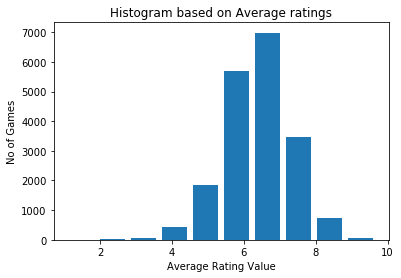

In [7]:
score_df.head()
#score_df['Average'].plot(kind='hist')
#score_df['Average'].plot.hist()
#score_df['Average'].hist(bins=10,grid=False,legend=True)

plt.title('Histogram based on Average ratings')
plt.hist(score_df['Average'],rwidth=0.8)
plt.xlabel('Average Rating Value')
plt.ylabel('No of Games')
#plt.grid(b=None)
plt.show()


##### Cleanup Data:

Below function is to remove some of the additional characters from the review. After that we we will apply this function to all the comments in the review. Additional we will split each review into separate words and store then under a new column comment_split.

In [8]:
def cleanup_data(data):
    pattern1=re.compile("[!#$%&'()*+,\'\"-./:;<=>?@[\]^_`{|}~]")
    pattern2=re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    data=re.sub(pattern1, '', data) 
    #data=re.sub(pattern2, ' ', data).lower()
    return data


In [9]:
reviews_df['comment']=reviews_df['comment'].apply(cleanup_data)
reviews_df['comment_split']=reviews_df['comment'].apply(lambda line:line.lower().split())
reviews_df.head()

,user,rating,comment,ID,name,comment_split
0,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic,"[hands, down, my, favorite, new, game, of, bgg..."
1,avlawn,10.0,I tend to either love or easily tire of coop g...,30549,Pandemic,"[i, tend, to, either, love, or, easily, tire, ..."
2,Mease19,10.0,This is an amazing coop game I play mostly wi...,30549,Pandemic,"[this, is, an, amazing, coop, game, i, play, m..."
3,cfarrell,10.0,Hey I can finally rate this game Ive been play...,30549,Pandemic,"[hey, i, can, finally, rate, this, game, ive, ..."
4,gregd,10.0,Love it great fun with my son 2 plays so far a...,30549,Pandemic,"[love, it, great, fun, with, my, son, 2, plays..."


##### Remove Unnecessary Words:

Based on a simple analysis of the words in the comments, we have huge data with lot of unnecessary words. THose words include common stop words defined in ntlk, numberic words, non english words and few additional words. ALong with these there are many words which were not available atleast in 5 reviews.

Removing all those words will improve the performance of the analysis as well as improve the results

In [10]:
flatten = itertools.chain.from_iterable
complete_data=list(flatten(reviews_df['comment_split']))
complete_counter=Counter(complete_data)

sorted_words=dict(sorted(complete_counter.items(),key=lambda i:i[1],reverse=True))
stop_words=set(stopwords.words('english'))
additional_words=['game','games','play','player','players','get','would','also','get','got','played','playing']

for word in list(sorted_words):
    if sorted_words[word] <5 or word=='br' or word in stop_words or not word.isalpha() or  word in additional_words:
        del sorted_words[word]
        
required_words=list(sorted_words.keys())

print('Total words ',len(complete_data))
print('No of unique words',len(complete_counter))
print('No of required words',len(required_words))

Total words  112674582
No of unique words 899487
No of required words 123392


In [11]:
reviews_df['comment_split']=reviews_df['comment_split'].apply(lambda line:[word for word in line if word in sorted_words])
reviews_df['rating']=reviews_df['rating'].round()
reviews_df.head()


,user,rating,comment,ID,name,comment_split
0,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic,"[hands, favorite, new, bgg, con, times, row, g..."
1,avlawn,10.0,I tend to either love or easily tire of coop g...,30549,Pandemic,"[tend, either, love, easily, tire, coop, pande..."
2,Mease19,10.0,This is an amazing coop game I play mostly wi...,30549,Pandemic,"[amazing, coop, mostly, wife, cant, really, im..."
3,cfarrell,10.0,Hey I can finally rate this game Ive been play...,30549,Pandemic,"[hey, finally, rate, ive, playtesting, couple,..."
4,gregd,10.0,Love it great fun with my son 2 plays so far a...,30549,Pandemic,"[love, great, fun, son, plays, far, looking, f..."


#### Histogram based on the reviews:

The below histogram shows an overview of the number of reviews for each rating value



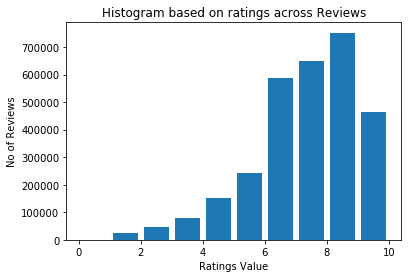

In [12]:
plt.title('Histogram based on ratings across Reviews')
plt.hist(reviews_df['rating'],rwidth=0.8)
plt.xlabel('Ratings Value')
plt.ylabel('No of Reviews')
plt.show()

##### High Frequency Words:

The below word cloud shows the Words with highest frequency in the reviews after cleanup

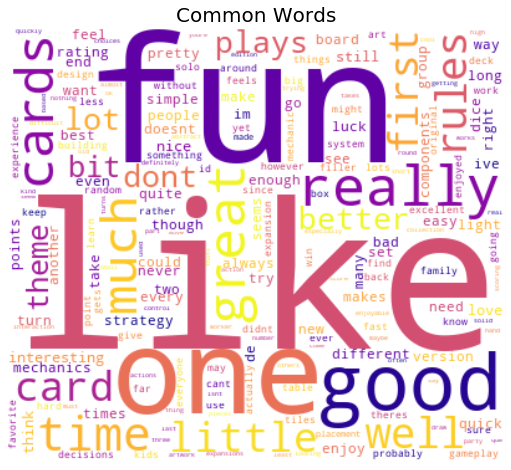

In [13]:

word_cloud = WordCloud(width=400, height=350,colormap='plasma',background_color='white').generate_from_frequencies(sorted_words)
plt.figure(figsize=(10, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Common Words', fontsize=20)
plt.show()


In [14]:
reviews_df['comment_joined']=reviews_df['comment_split'].apply(' '.join)

##### Save reviews data:

Finally we cleaned up the complete data and store the processed reviews data into a pickle file

In [15]:
reviews_final=reviews_df[['comment_joined','rating']].copy()
with open('reviews_final.pkl', 'wb') as f_reviews:
    pickle.dump(reviews_final, f_reviews)

##### Split Data

We will split the data into training and test datasets each with 10% of the actual data

In [17]:

random.seed(0)
temp=random.randint(0,100)
train_data_x,test_data_x,train_data_y,test_data_y=train_test_split(reviews_df['comment_joined'],reviews_df['rating'],train_size=0.1,test_size=0.1,random_state=temp)

In [18]:
print('Train Data comments Shape : ',train_data_x.shape)
print('Test Data comments Shape : ',test_data_x.shape)
print('Train Data rating Shape : ',train_data_y.shape)
print('Test Data ratings Shape : ',test_data_y.shape)

Train Data comments Shape :  (299502,)
Test Data comments Shape :  (299503,)
Train Data rating Shape :  (299502,)
Test Data ratings Shape :  (299503,)


##### Train Data:

Below histogram gives an overview of the distribution of the training reviews between the possible 10 ratings

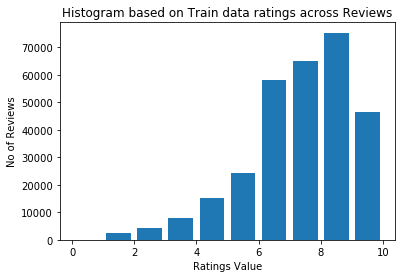

In [19]:
plt.title('Histogram based on Train data ratings across Reviews')
plt.hist(train_data_y,rwidth=0.8)
plt.xlabel('Ratings Value')
plt.ylabel('No of Reviews')
plt.show()


##### Test Data:

Below histogram gives an overview of the distribution of the test reviews between the possible 10 ratings

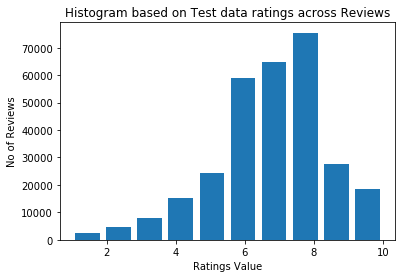

In [20]:
plt.title('Histogram based on Test data ratings across Reviews')
plt.hist(test_data_y,rwidth=0.8)
plt.xlabel('Ratings Value')
plt.ylabel('No of Reviews')
plt.show()

##### Models:

So far we did all the required cleanup for the given data. Now we will use the cleaned training data for training the models. In
this process i will use 4 different models. THe models are as below

1. Linear Regression
2. Logistic Regression
3. Naive Bayes
4. Random Forest Classifier

##### Linear Regression:

Linear regression is a linear approach to modelling the relationship between a scalar response and one or more  dependent and independent variables.  Linear regression model fits using the least squares approach

Linear regression can interpreted as below

Y=a0+a1*X1+a2*X2+a3*X3+.....


##### Logistic Regression:

Logistic regression is a model where the relationship between the response and the variables is a Logarithmic in nature. Unlike Linear regression output which is continuous, Logistic regression output is more of discrete in nature.

Logistic regression can be interpreted as below

log p/(1-p)= b^(a0+a1*X1+a2*X2+a3*X3+.....)


##### Naive Bayes:

Naive Bayes classifier is a probabilistic classifier based on applying Bayes' theorem with naive independence assumption between the features. Naive Bayes classifier is highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.


Bayes' theorem, the conditional probability can be interpreted as below

p(C|X) = p(C) * p(X|C)/p(X)


##### Random Forest Classifier:

Random Forest Classifier is an ensemble learning method for classification that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) of the individual trees. By using random forests we can reduce the overfitting on the training data that is normally seen in an individual decision tree.

Random forests uses only certain features in the dataset to split for a decision tree rather than using all the features in creating the tree. 



In [26]:
vector=TfidfVectorizer()
train_vector_x=vector.fit_transform(train_data_x)
test_vector_x=vector.transform(test_data_x)

with open('vocabulary.pkl', 'wb') as f_vectorizer:
    pickle.dump(vector.vocabulary_, f_vectorizer)


##### Linear Regression

Linear Regression is a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [28]:
lin_reg=LinearRegression(n_jobs=-1)
lin_reg.fit(train_vector_x,train_data_y)

lin_reg_train_model=lin_reg.predict(train_vector_x)


In [29]:
accuracy_lin_train=accuracy_score(lin_reg_train_model.round(),train_data_y)

print('Linear Regression Train Accuracy',round(accuracy_lin_train*100,2))

lin_reg_test_model=lin_reg.predict(test_vector_x)
accuracy_lin_test=accuracy_score(lin_reg_test_model.round(),test_data_y)

print('Linear Regression Test Accuracy',round(accuracy_lin_test*100,2))

with open('lin_reg.pkl', 'wb') as f_lin_reg:
    pickle.dump(lin_reg, f_lin_reg)

Linear Regression Train Accuracy 39.77
Linear Regression Test Accuracy 26.85


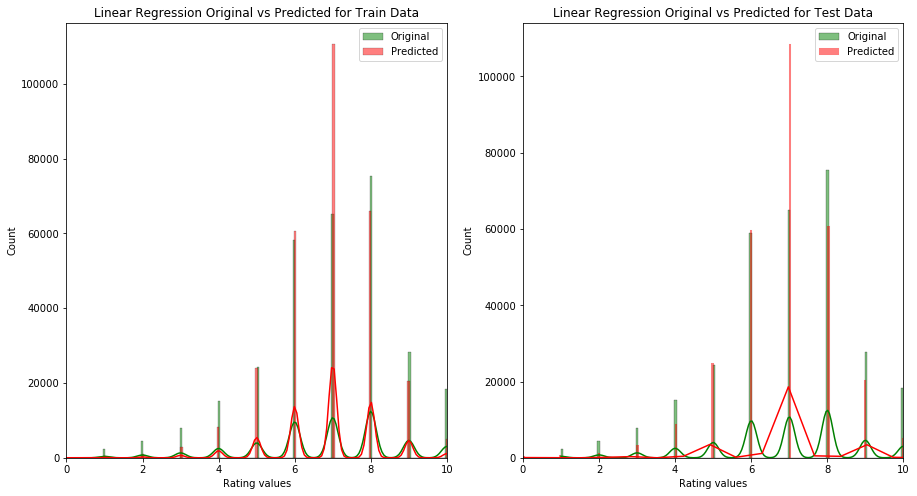

In [30]:

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))

sns.histplot(train_data_y.values,label='Original',kde=True,color='green',ax=ax1)
sns.histplot(lin_reg_train_model.round(),label='Predicted',kde=True,color='red',ax=ax1)
ax1.set_xlim(0,10)
ax1.set_xlabel('Rating values')
ax1.set_title('Linear Regression Original vs Predicted for Train Data')
ax1.legend()

sns.histplot(test_data_y.values,label='Original',kde=True,color='green',ax=ax2)
sns.histplot(lin_reg_test_model.round(),label='Predicted',kde=True,color='red',ax=ax2)
ax2.set_xlim(0,10)
ax2.set_xlabel('Rating values')
ax2.set_title('Linear Regression Original vs Predicted for Test Data')
ax2.legend()


##### Logistic Regression

Logistic regression is a linear model for classification rather than regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

In [31]:
log_reg=LogisticRegression(n_jobs=-1,verbose=3)

log_reg.fit(train_vector_x,train_data_y)

log_reg_model=log_reg.predict(train_vector_x)
accuracy_log_train=accuracy_score(log_reg_model.round(),train_data_y)



In [32]:
log_reg_test_model=log_reg.predict(test_vector_x)
accuracy_log_test=accuracy_score(log_reg_test_model.round(),test_data_y)

print('Logarithmic Regression Train Accuracy',round(accuracy_log_train*100,2))
print('Logarithmic Regression Test Accuracy',round(accuracy_log_test*100,2))


Logarithmic Regression Train Accuracy 37.35
Logarithmic Regression Test Accuracy 31.94


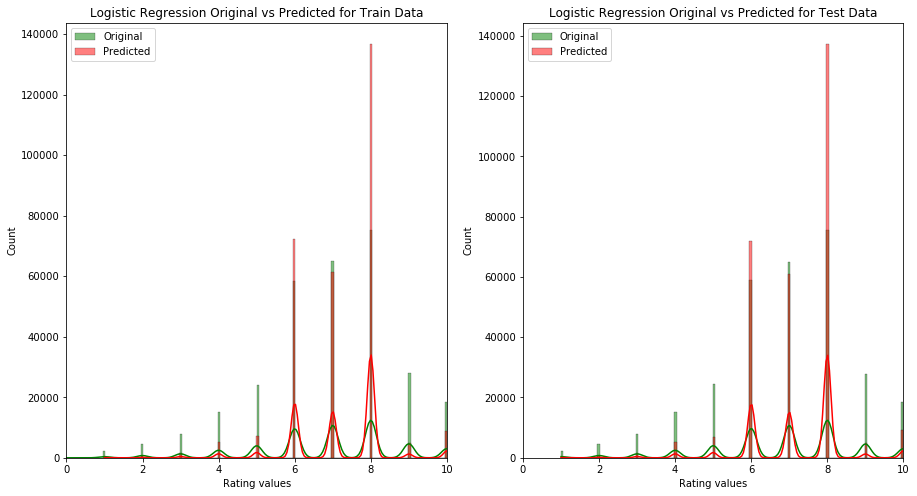

In [33]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))

sns.histplot(train_data_y.values,label='Original',kde=True,color='green',ax=ax1)
sns.histplot(log_reg_model.round(),label='Predicted',kde=True,color='red',ax=ax1)
ax1.set_xlim(0,10)
ax1.set_xlabel('Rating values')
ax1.set_title('Logistic Regression Original vs Predicted for Train Data')
ax1.legend()

sns.histplot(test_data_y.values,label='Original',kde=True,color='green',ax=ax2)
sns.histplot(log_reg_test_model.round(),label='Predicted',kde=True,color='red',ax=ax2)
ax2.set_xlim(0,10)
ax2.set_xlabel('Rating values')
ax2.set_title('Logistic Regression Original vs Predicted for Test Data')
ax2.legend()


##### Logistic Regression with 1000 Iterations

This is same as the earlier Logistic Regression model except that here we set the max_ite parameter to 1000. This will improve the train the model better and we can see the improved results in accuracy score as well.

In [38]:
log_reg=LogisticRegression(max_iter=1000,n_jobs=-1)

log_reg.fit(train_vector_x,train_data_y)

log_reg_model=log_reg.predict(train_vector_x)
accuracy_log_train=accuracy_score(log_reg_model.round(),train_data_y)



In [39]:
log_reg_test_model=log_reg.predict(test_vector_x)
accuracy_log_test=accuracy_score(log_reg_test_model.round(),test_data_y)

print('Logarithmic Regression Train Accuracy (1000 iterations)',round(accuracy_log_train*100,2))
print('Logarithmic Regression Test Accuracy (1000 iterations)',round(accuracy_log_test*100,2))

with open('log_reg.pkl', 'wb') as f_log_reg:
    pickle.dump(log_reg, f_log_reg)

Logarithmic Regression Train Accuracy (1000 iterations) 42.76
Logarithmic Regression Test Accuracy (1000 iterations) 31.65


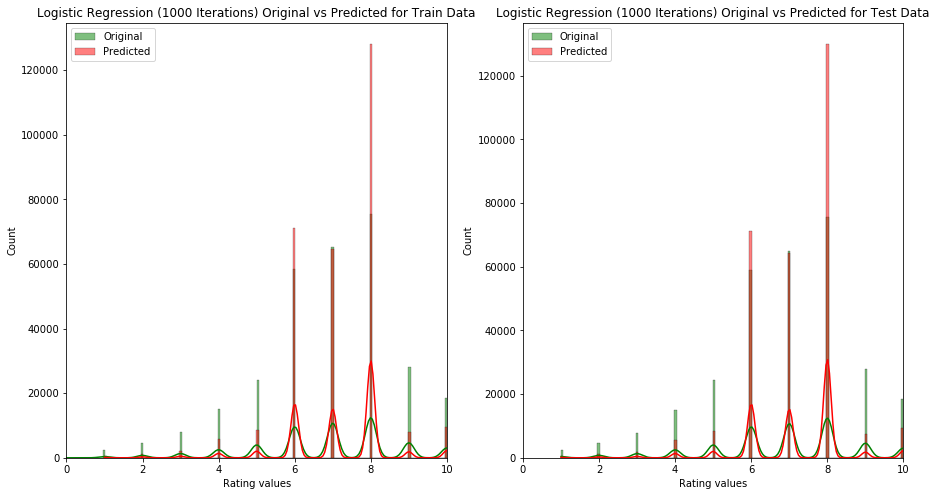

In [40]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))

sns.histplot(train_data_y.values,label='Original',kde=True,color='green',ax=ax1)
sns.histplot(log_reg_model.round(),label='Predicted',kde=True,color='red',ax=ax1)
ax1.set_xlim(0,10)
ax1.set_xlabel('Rating values')
ax1.set_title('Logistic Regression (1000 Iterations) Original vs Predicted for Train Data')
ax1.legend()

sns.histplot(test_data_y.values,label='Original',kde=True,color='green',ax=ax2)
sns.histplot(log_reg_test_model.round(),label='Predicted',kde=True,color='red',ax=ax2)
ax2.set_xlim(0,10)
ax2.set_xlabel('Rating values')
ax2.set_title('Logistic Regression (1000 Iterations) Original vs Predicted for Test Data')
ax2.legend()


##### Naive Bayes Model

In this project we use scikit's MultinomialNB to implement Naive Bayes. MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). The distribution is parametrized by vectors 
 for each class , where  is the number of features (in text classification, the size of the vocabulary) and  is the probability of feature  appearing in a sample belonging to class 

In [46]:
naive_bayes=MultinomialNB()
naive_bayes.fit(train_vector_x,train_data_y)
naive_bayes_model=naive_bayes.predict(train_vector_x)
accuracy_naive_train=accuracy_score(naive_bayes_model.round(),train_data_y)

print('Naive Bayes Train Accuracy ',round(accuracy_naive_train*100,2))

Naive Bayes Train Accuracy  36.67


In [47]:
naive_bayes_test_model=naive_bayes.predict(test_vector_x)
accuracy_naive_test=accuracy_score(naive_bayes_test_model.round(),test_data_y)

print('Naive Bayes Test Accuracy ',round(accuracy_naive_test*100,2))

with open('naive_bayes.pkl', 'wb') as f_naive_bayes:
    pickle.dump(naive_bayes, f_naive_bayes)

Naive Bayes Test Accuracy  29.64


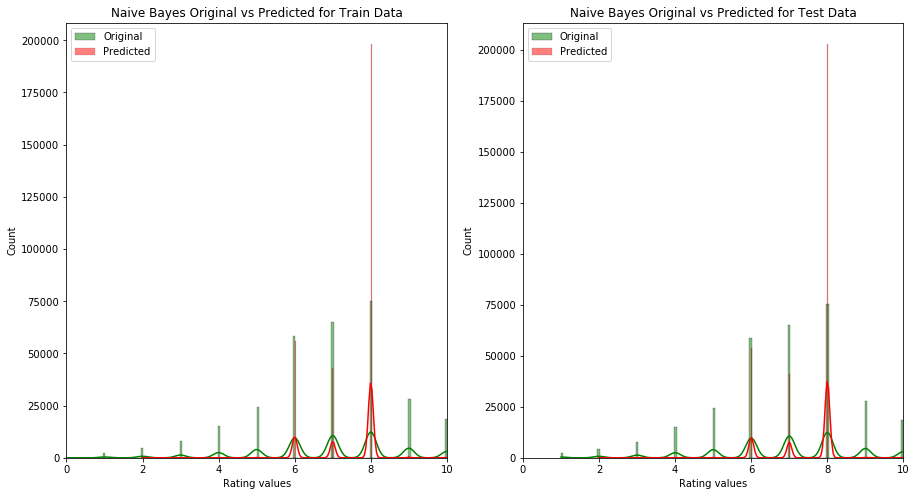

In [48]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))

sns.histplot(train_data_y.values,label='Original',kde=True,color='green',ax=ax1)
sns.histplot(naive_bayes_model.round(),label='Predicted',kde=True,color='red',ax=ax1)
ax1.set_xlim(0,10)
ax1.set_xlabel('Rating values')
ax1.set_title('Naive Bayes Original vs Predicted for Train Data')
ax1.legend()

sns.histplot(test_data_y.values,label='Original',kde=True,color='green',ax=ax2)
sns.histplot(naive_bayes_test_model.round(),label='Predicted',kde=True,color='red',ax=ax2)
ax2.set_xlim(0,10)
ax2.set_xlabel('Rating values')
ax2.set_title('Naive Bayes Original vs Predicted for Test Data')
ax2.legend()

##### Random Forest Classifier:

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [41]:
random_classifier=RandomForestClassifier(n_estimators=100,verbose=3,n_jobs=-1,max_depth=5)
random_classifier.fit(train_vector_x,train_data_y)
random_classifier_train_model=random_classifier.predict(train_vector_x)
accuracy_random_classifier_train=accuracy_score(random_classifier_train_model.round(),train_data_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100building tree 8 of 100

building tree 9 of 100
building tree 10 of 100building tree 11 of 100building tree 12 of 100


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100building tree 26 of 100

building tree 27 of 100
building tree 28 of 100
building tree 29 of 100building tree 30 of 100



[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.0s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100building tree 67 of 100

building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.0s finished


In [42]:
random_classifier_test_model=random_classifier.predict(test_vector_x)
accuracy_random_classifier_test=accuracy_score(random_classifier_test_model.round(),test_data_y)

print('Random Classifier Train Accuracy ',round(accuracy_random_classifier_train*100,2))
print('Random Classifier Test Accuracy ',round(accuracy_random_classifier_test*100,2))

with open('random_classifier.pkl', 'wb') as f_random_classifier:
    pickle.dump(random_classifier, f_random_classifier)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.6s


Random Classifier Train Accuracy  25.16
Random Classifier Test Accuracy  25.19


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.1s finished


##### Random Forest Classifier with max depth 500:

In the earlier run i gave max_depth of 5. This value restricts the depth of the tree without which the tree will split till each leaf contains only min_samples_split samples. The default value for min_samples_split is 2 which means the tree will split in entirety but that will take huge amount of time.

So, in my earlier case a depth of 5 is restricting the forest creation and it is completing very quickly. Also the results are not great which can be see in both training and test accuracy. So, i tested for various depths and a depth of 500 gave much better results with a decent run time of 90 mins. 

Alternatively i tried with min_samples_split of 10 and that gave very similar results as max_depth of 500 but took more time. So, i am settling with max_depth of 500.

In [74]:
random_classifier=RandomForestClassifier(n_estimators=100,verbose=3,n_jobs=-1,max_depth=500)
random_classifier.fit(train_vector_x,train_data_y)
random_classifier_train_model=random_classifier.predict(train_vector_x)
accuracy_random_classifier_train=accuracy_score(random_classifier_train_model.round(),train_data_y)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 11.8min


building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 94.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   17.2s finished


In [75]:
random_classifier_test_model=random_classifier.predict(test_vector_x)
accuracy_random_classifier_test=accuracy_score(random_classifier_test_model.round(),test_data_y)

print('Random Classifier Train Accuracy ',round(accuracy_random_classifier_train*100,2))
print('Random Classifier Test Accuracy ',round(accuracy_random_classifier_test*100,2))

with open('random_classifier.pkl', 'wb') as f_random_classifier:
    pickle.dump(random_classifier, f_random_classifier)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   18.4s finished


Random Classifier Train Accuracy  89.77
Random Classifier Test Accuracy  30.17


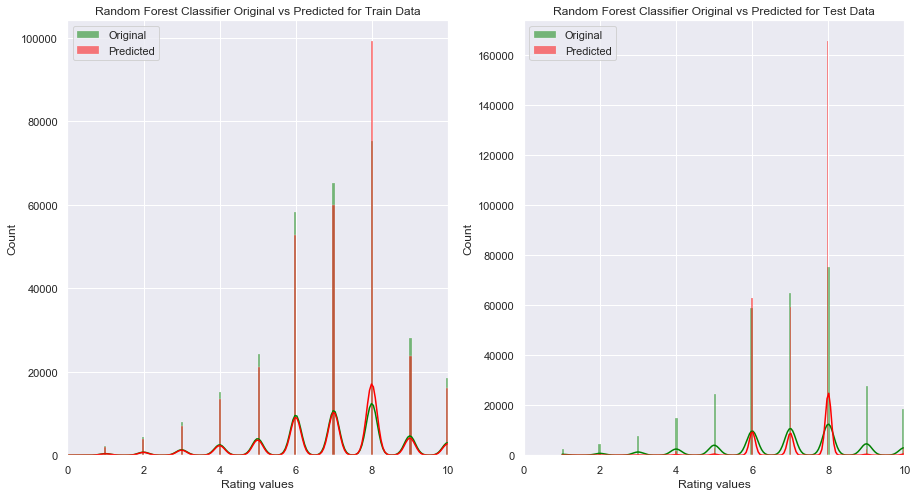

In [235]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))

sns.histplot(train_data_y.values,label='Original',kde=True,color='green',ax=ax1)
sns.histplot(random_classifier_train_model.round(),label='Predicted',kde=True,color='red',ax=ax1)
ax1.set_xlim(0,10)
ax1.set_xlabel('Rating values')
ax1.set_title('Random Forest Classifier Original vs Predicted for Train Data')
ax1.legend()

sns.histplot(test_data_y.values,label='Original',kde=True,color='green',ax=ax2)
sns.histplot(random_classifier_test_model.round(),label='Predicted',kde=True,color='red',ax=ax2)
ax2.set_xlim(0,10)
ax2.set_xlabel('Rating values')
ax2.set_title('Random Forest Classifier Original vs Predicted for Test Data')
ax2.legend()


The above result shows an excellent output on the Training data but it didn't perform similarly on the test data. This is primarily because of overfitting. A further increase on depth might improve the results but given the hardware constraints i will limit the maximum depth to 500.


In [49]:
sample_review=['The movie is super','The movie is not worst','The movie is  excellent','The movie is  worst','I like this movie','i like this movie']
sample_review_vector_x=vector.transform(sample_review)

sample_predict_lin=lin_reg.predict(sample_review_vector_x)
sample_predict_log=log_reg.predict(sample_review_vector_x)
sample_predict_naive=naive_bayes.predict(sample_review_vector_x)
sample_predict_random_classifier=random_classifier.predict(sample_review_vector_x)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [52]:
print('Sample Review results for Linear Regression',sample_predict_lin.round())
print('Sample Review results for Logistic Regression',sample_predict_log.round())
print('Sample Review results for Naive Bayes',sample_predict_naive.round())
print('Sample Review results for Random Classifier ',sample_predict_random_classifier.round())

Sample Review results for Linear Regression [7. 3. 8. 3. 7. 7.]
Sample Review results for Logistic Regression [8. 1. 9. 1. 7. 7.]
Sample Review results for Naive Bayes [8. 6. 8. 6. 8. 8.]
Sample Review results for Random Classifier [8. 1. 8. 1. 8. 8.]


##### Conclusion:
  I started with doing Linear regression and then tried Logistic Regression. I see muxh improvement with Logistic regression. Then i tried Logistic regression with 1000 iterations and that showed decent results. Then i tried Naive Bayes. In Naive Bayes we can clearly see from the graphs that the results are distorted towards a particular value (specifically value 8). This is applicable for both train data and test data. Then i tried Random Forest Classifier. The results of this classifier is interesting. The train data showed much better accuracy compared to any other model. But test data results are not much better than logistic regression though it is better than Linear and Naive Bayes models. The Random Forest classifier results are more Overfitted with Training data. 
  
  Another interesting thing is Naive Bayes is the fastest model to built and Random Forest Classifier took very long time. Logistic regression is also faste but when we run it for 1000 iterations it took more time. Over all, based on the sample data results and model size logistic regression is the best algorithm  for my application. 
  

##### Contribution:

I built an application for the rating predictor based on the review. For this purpose i used flask on pythonanywhere. This application can take a review through an enterable form and can calculate the rating based on our model built above. Additionally for cleanup data i used some python inbuilt flattening the multidimensional arrays to quickly identify the low frequency and redundant words. This process reduced the run time complexity from O(n^2) to O(n) which is very important for the large dataset.
    

##### Challenges:

Due to the sheer size of data it took good amount of time to cleanup the data. I utilized some of the functions i created in my Naive Bayes Classifier assignment for cleanup the data. Also when i started with RandomForestClassifier it took several hours but not result. Then i went through some documentation and understood the importance of no of jobs ,maximum depth and also verbose which can help in tracking the progress. I started with a maximum depth of 5 and increased it slowly based on results. But due the time taken and size of the model i stopped the maximum depth at 500. For a maximum depth of 500 with 4 parallel jobs it is taking 90 minutes. More than time the model built is of size 3.54 GB. So, even if we increase the maximum depth further to improve the results along with time, the model will increase in size which cannot be used in our flask app based on the size limitations of our webapp hosting site pythonanywhere.

I think given the capacity of the servers both size and processing power, RandomForestClassifier can give better results.

My online rating predictor can be found at http://sravanisuravajhula.pythonanywhere.com/

##### References:

* Linear Regression : https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

* Logistic Regression : https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

* Naive Bayes : https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes

* Random Forest Classifer: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

* Board Game Geek Review : https://en.wikipedia.org/wiki/BoardGameGeek

* Word Cloud : https://www.datacamp.com/community/tutorials/wordcloud-python

* Flask Example: https://realpython.com/flask-by-example-part-1-project-setup/

* Flask Forms: https://python-adv-web-apps.readthedocs.io/en/latest/flask_forms.html

###### Additionally i refered below sites for general queries:

* Stack Overflow : https://stackoverflow.com/

* Wikipedia : https://en.wikipedia.org/

* Sci-kit : https://scikit-learn.org/stable/user_guide.html

* SeaBorn : https://seaborn.pydata.org/api.html